In [15]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# carrega os dados do arquivo CSV
data = pd.read_csv("parkinsons.data")

# separa os dados em features (X) e labels (Y)
X = data.drop(['name', 'status'], axis=1)
Y = data['status']

# normaliza os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [28]:
# divide o conjunto de dados em treinamento e teste (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# cria o modelo do perceptron
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# cria o modelo do perceptron com mais camadas
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
# compila o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
# treina o modelo
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=10)

# avalia o modelo
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('Test accuracy:', test_acc)


Epoch 1/50
16/16 [==============================] - 1s 15ms/step - loss: 0.5865 - accuracy: 0.6859 - val_loss: 0.4914 - val_accuracy: 0.7949
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4431 - accuracy: 0.8013 - val_loss: 0.3972 - val_accuracy: 0.8205
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.3855 - accuracy: 0.8462 - val_loss: 0.3578 - val_accuracy: 0.8205
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.8141 - val_loss: 0.3261 - val_accuracy: 0.8205
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.2871 - accuracy: 0.8654 - val_loss: 0.2987 - val_accuracy: 0.8205
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 0.2696 - accuracy: 0.8590 - val_loss: 0.2870 - val_accuracy: 0.8205
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.2652 - accuracy: 0.8782 - val_loss: 0.2696 - val_accuracy: 0.8462
Epoch 8/50
16/16 [=

In [31]:
# salva o modelo em um arquivo HDF5
model.save('parkinsons_nn1.h5')


In [34]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               2944      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Faz as previsões para o conjunto de teste
y_pred = model.predict(X_test)

# Converte as previsões em rótulos
y_pred = np.where(y_pred > 0.5, 1, 0)

# Calcula a acurácia
accuracy = accuracy_score(Y_test, y_pred)
print("Acurácia:", accuracy)

# Calcula a matriz de confusão
cm = confusion_matrix(Y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

2/2 [==============================] - 0s 3ms/step
Acurácia: 0.9487179487179487
Matriz de Confusão:
[[ 5  2]
 [ 0 32]]


<AxesSubplot:>

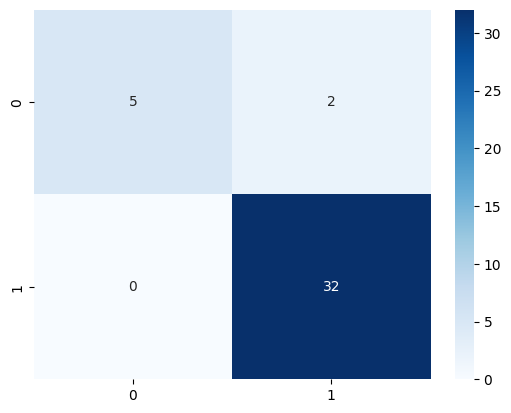

In [39]:
# Plota a matriz de confusão em um heatmap
sns.heatmap(cm, annot=True, cmap="Blues")


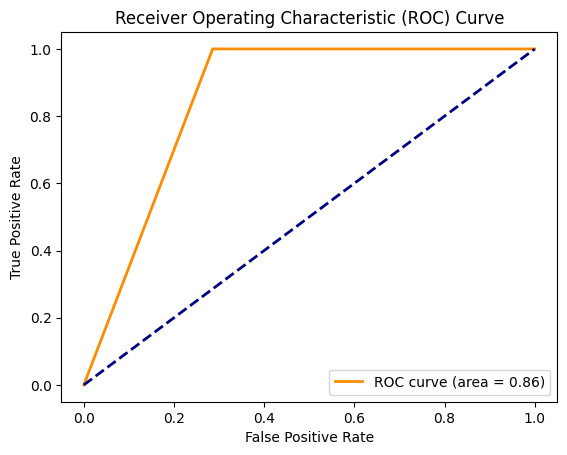

In [40]:
# Calcula e plota a curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [49]:
from sklearn.metrics import precision_recall_fscore_support

# Faz as previsões para o conjunto de teste
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Converte as previsões em rótulos
y_pred = np.round(y_pred).flatten()


# Calcula a acurácia
accuracy = accuracy_score(Y_test, y_pred)


# Calcula a matriz de confusão
confusion_matrix = confusion_matrix(Y_test, y_pred)

# Calcula as métricas de classificação
tn, fp, fn, tp = confusion_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)


precision, recall, fscore, support = precision_recall_fscore_support(Y_test, y_pred)

# precisão e F-score para a classe 1
precision_class1 = precision[1]
fscore_class1 = fscore[1]


2/2 [==============================] - 0s 5ms/step


In [52]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

2/2 [==============================] - 0s 4ms/step


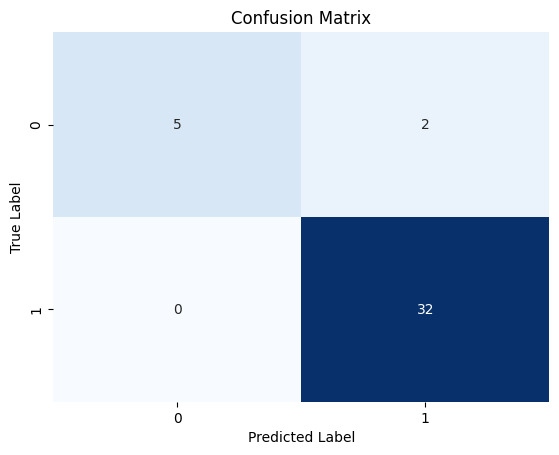

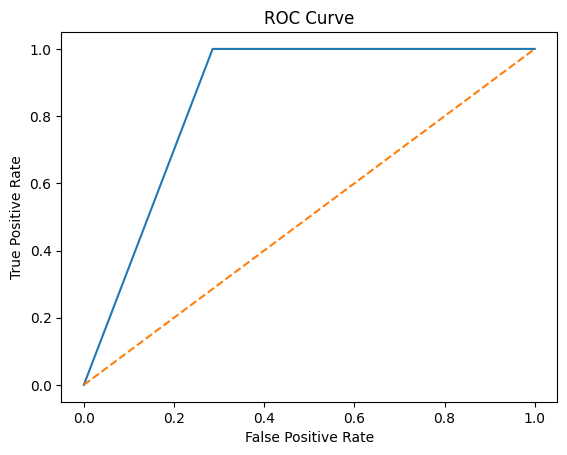

Accuracy: 94.87%
Sensitivity: 100.00%
Specificity: 71.43%
Precision: 94.12%
F1 Score: 96.97%


In [53]:
from sklearn.metrics import recall_score,confusion_matrix,precision_score,f1_score,accuracy_score,roc_curve, auc,classification_report
# Faz as previsões para o conjunto de teste
y_pred = model.predict(X_test)

# Converte as previsões em rótulos
y_pred = (y_pred > 0.5).astype(int)
y_test = (Y_test > 0.5).astype(int)

# Calcula as métricas de avaliação
acc = accuracy_score(y_test, y_pred)
sens = recall_score(y_test, y_pred)
espec = specificity_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plota a matriz de confusão em um heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Adiciona labels aos eixos
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Mostra o plot
plt.show()

# Calcula e plota a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Imprime as métricas de avaliação
print("Accuracy: {:.2f}%".format(acc*100))
print("Sensitivity: {:.2f}%".format(sens*100))
print("Specificity: {:.2f}%".format(espec*100))
print("Precision: {:.2f}%".format(prec*100))
print("F1 Score: {:.2f}%".format(f1*100))
